Created by Jake Norbie

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
from pathlib import Path
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.deterministic import DeterministicProcess

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

train_data_dir = Path('../data/original/train.csv')
test_data_dir = Path('../data/original/test.csv')
stores_data_dir = Path('../data/original/stores.csv')
transactions_data_dir = Path('../data/original/transactions.csv')
holidays_events_data_dir = Path('../data/original/holidays_events.csv')
oil_data_dir = Path('../data/original/oil.csv')


training_datatype_map = {
    'store_nbr': 'category',
    'family': 'category',
    'sales': 'float32',
    'onpromotion': 'uint64',
}
testing_datatype_map = {
    'store_nbr': 'category',
    'family': 'category',
    'onpromotion': 'uint64',
}
stores_datatype_map = {
    'cluster': 'int8',
}

train_df = pd.read_csv(
    train_data_dir,
    dtype=training_datatype_map,
    parse_dates=['date'],
)
test_df = pd.read_csv(
    test_data_dir,
    dtype=testing_datatype_map,
    parse_dates=['date'],
)
stores_df = pd.read_csv(stores_data_dir, dtype=stores_datatype_map)   
transactions_df = pd.read_csv(transactions_data_dir, parse_dates=['date']).sort_values(['date', 'store_nbr'])
holidays_events_df = pd.read_csv(holidays_events_data_dir, parse_dates=['date'])
oil_df = pd.read_csv(oil_data_dir, parse_dates=['date'])

### ARIMA

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

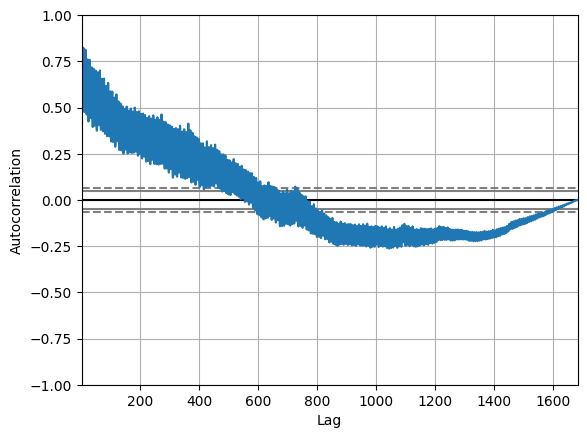

In [5]:
daily_average_store_sales = train_df[['date', 'sales']].groupby(['date']).sum()
pd.plotting.autocorrelation_plot(daily_average_store_sales['sales'])


In [20]:
specific_store_subset = train_df[train_df['store_nbr'] == '12']
specific_category_subset = train_df[train_df['family'] == train_df['family'][3]]
store_and_category_subset = train_df[(train_df['store_nbr'] == '12') & (train_df['family'] == train_df['family'][3])]

daily_average_specific_store_sales = specific_store_subset[['date', 'sales']].groupby(['date']).sum()
daily_average_specific_category_sales = specific_category_subset[['date', 'sales']].groupby(['date']).sum()
daily_average_specific_store_and_category_sales = store_and_category_subset[['date', 'sales']].groupby(['date']).sum()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

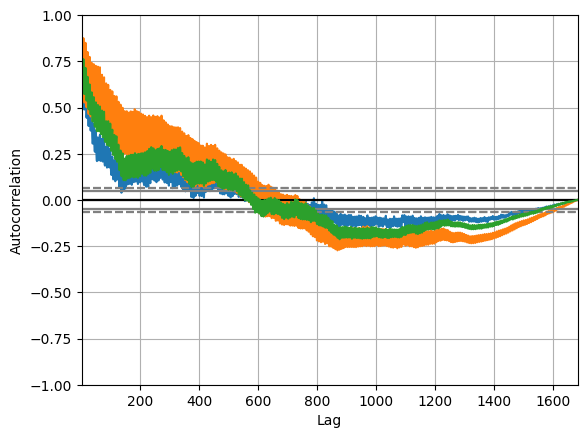

In [23]:
pd.plotting.autocorrelation_plot(daily_average_specific_store_sales)
pd.plotting.autocorrelation_plot(daily_average_specific_category_sales)
pd.plotting.autocorrelation_plot(daily_average_specific_store_and_category_sales)

Here we see that the category has a higher autocorrelation coefficient than the specific store does. In fact, adding in specific stores lowers the overall autocorrelation.

In [27]:
lag_value = 200
difference_order = 1
moving_average = 14

ARIMA_model = ARIMA(daily_average_store_sales, order=[lag_value, difference_order, moving_average]).fit()
residuals = pd.DataFrame(ARIMA_model.resid)
residuals.plot()

c:\Users\jaken\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jaken\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jaken\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


KeyboardInterrupt: 

Due to the walkforward approach, ARIMA will take too long and is not very feasible for this application.